In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### OFERTA Y DEMANDA AGREGADA CON PRECIOS Y TIPO DE CAMBIO FLEXIBLES PARA UNA ECONOMÍA ABIERTA:

#### 1. Derivación de la Demanda Agregada $(DA)$:

In [44]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.9
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 9
p = 0.8
rº = 8
r = 12
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def DA(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    DA = [Co + Io + Go + x1 *Yº +(x2 + m2)* Eo + (x2 + m2)* p*rº -(h +(x2 +m2)*p)*r]+[(b-m1)*(1-t)]*Y
    return DA

DA = DA(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


In [45]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

/var/folders/t0/bh8jstj91y5ctmcqzzd24zyc0000gn/T/ipykernel_73507/1659494988.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(Y, DA, "k-", label = "DA", color = "#3D59AB") #Demanda agregada


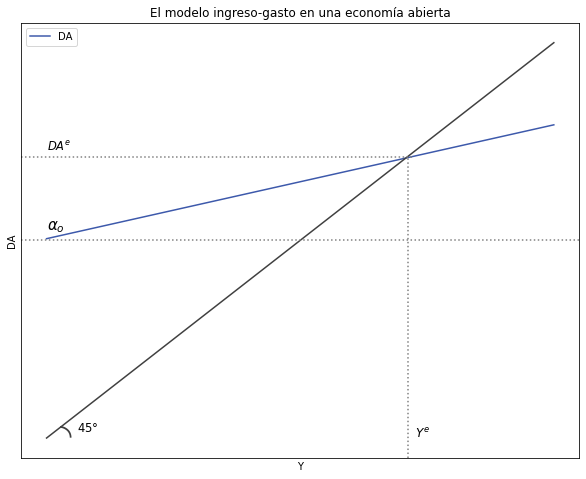

In [46]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA, "k-", label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=124, xmin= 0, xmax= 1, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 130, '$α_o$', fontsize = 15, color = 'black')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')

# Título y leyenda
ax.set(title="El modelo ingreso-gasto en una economía abierta", xlabel= r'Y', ylabel= r'DA')
ax.legend()

plt.show()



#### 2. El modelo IS-LM con tipo de cambio flexible y libre movilidad de capitales:

In [114]:
# IS

Y_size = 100 

Co = 25
Io = 5
Go = 18
h = 0.8
b = 0.4
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 8
p = 0.8
rº = 8
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS = r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


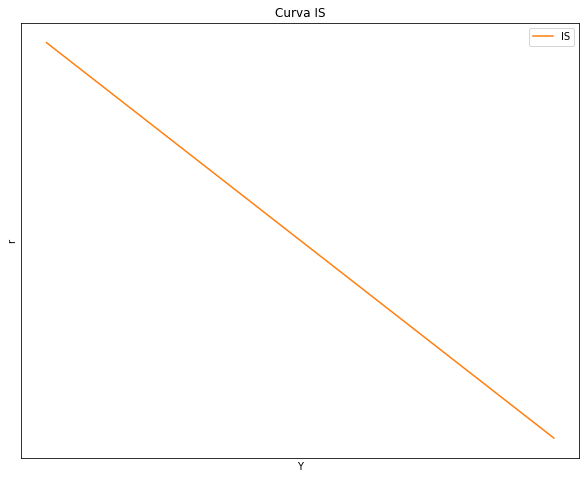

In [93]:
# Gráfico de la curva IS

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title = "Curva IS", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

In [80]:
# LM

Y_size = 100 

k = 0.4
j = 0.7               
Ms = 70             
Po  = 20 

Y = np.arange(Y_size)

# Ecuación

def r_LM( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM = r_LM( k, j, Ms, Po, Y)

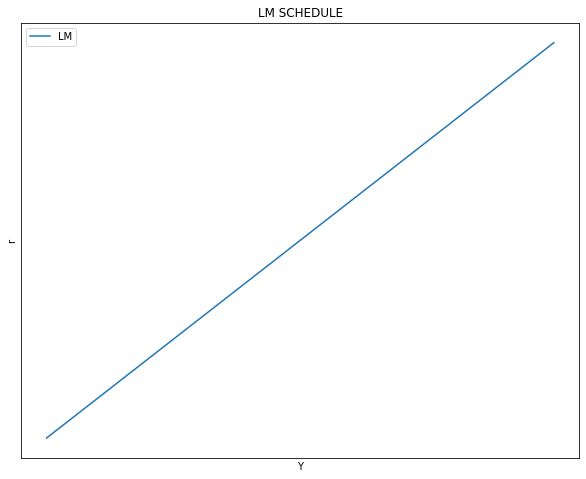

In [94]:
    # Gráfico de la curva LM

# Dimensiones del gráfico
y_max = np.max(Y)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curvas a graficar
ax.plot(Y, r_LM, label="LM", color = 'C0')

# Título y leyenda
ax.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

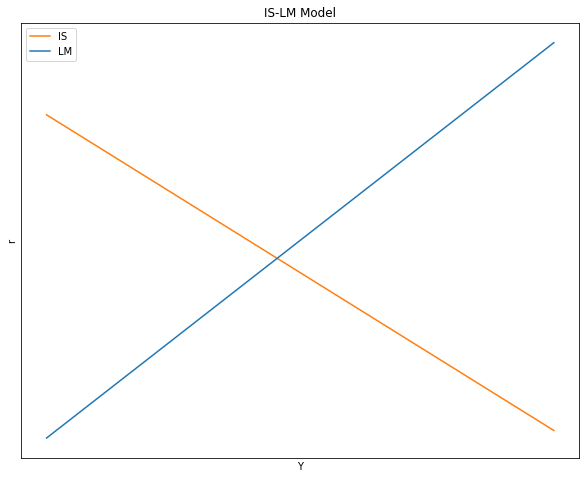

In [95]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_LM, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### 3.1 Estática comparativa:

#### - Incremento Gasto de Gobierno $G_0$:

In [138]:
# IS

Y_size = 100 

Co = 25
Io = 5
Go = 18
h = 0.8
b = 0.4
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 8
p = 0.8
rº = 8
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS = r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)

#------------
Go = 35

# Ecuación

def r_IS_G(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS_G = r_IS_G(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


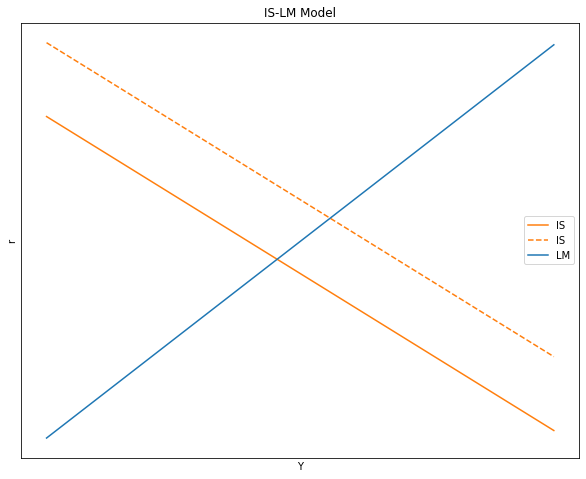

In [139]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_IS_G, label = "IS", color = "C1", linestyle ='dashed') #IS

ax.plot(Y, r_LM, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### - Incremento Masa Monetaria $M_o^s$:

In [140]:
# LM

Y_size = 100 

k = 0.4
j = 0.7               
Ms = 70             
Po  = 20 

Y = np.arange(Y_size)

# Ecuación

def r_LM( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM = r_LM( k, j, Ms, Po, Y)


#------------------------------------------------

# Nueva Curva LM
Ms = 200

# Ecuación

def r_LM_Ms( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM_Ms = r_LM_Ms( k, j, Ms, Po, Y)

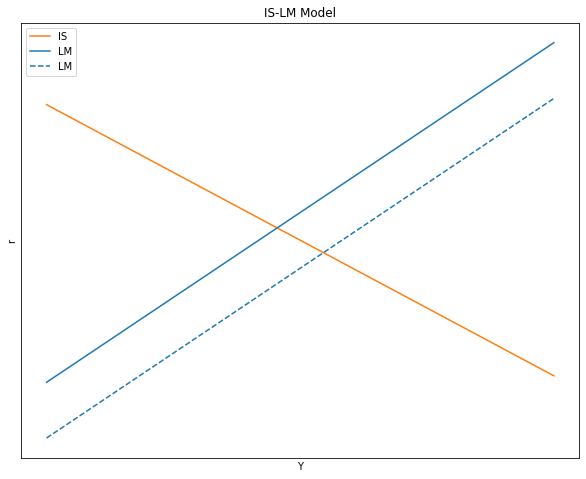

In [142]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_LM, label="LM", color = "C0")  #LM
ax.plot(Y, r_LM_Ms, label="LM", color = "C0", linestyle = 'dashed')  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()